In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from random import shuffle
import os
import cv2
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm 
import seaborn as sns


np.set_printoptions(precision=5)#show 5 number after decimal point 

In [37]:
DATA_url = r"C:\Users\noa12\OneDrive\מסמכים\GitHub\Dogs_Vs_Cats_Project\train"
imgSize = 50

In [41]:
def label_img(img):
    word_label = img.split('.')[-3]
    if word_label == 'cat': return "0"
    elif word_label == 'dog': return "1"

In [42]:
def create_data():
    data = []
    for img in tqdm(os.listdir(DATA_url)):
        label = label_img(img)
        path = os.path.join("train\\",img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (imgSize,imgSize))
        data.append([np.array(img),np.array(label)])
    shuffle(data)
    np.save('data.npy', data)
    return data

In [43]:
data = create_data()

100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [02:40<00:00, 156.21it/s]


In [44]:
# load the data:
data = np.load('data.npy',allow_pickle=True)

In [45]:
X = np.array([i[0] for i in data])
Y = np.array([i[1] for i in data])

In [46]:
from sklearn.model_selection import train_test_split

#split the data
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=42)

In [48]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [50]:
print("X_train.shape :" ,X_train.shape)
print("y_train.shape :", y_train.shape)
print ("X_test.shape :" , X_test.shape)
print("y_test.shape :", y_test.shape)

X_train.shape : (22500, 50, 50)
y_train.shape : (22500,)
X_test.shape : (2500, 50, 50)
y_test.shape : (2500,)


In [51]:
X_train = X_train.reshape((22500, 50*50))
y_train = y_train.reshape((22500,1))
X_test = X_test.reshape((2500,50*50))
y_test = y_test.reshape((2500,1))

print("X_train.shape :" ,X_train.shape)
print("y_train.shape :", y_train.shape)
print ("X_test.shape :" , X_test.shape)
print("y_test.shape :", y_test.shape)

X_train.shape : (22500, 2500)
y_train.shape : (22500, 1)
X_test.shape : (2500, 2500)
y_test.shape : (2500, 1)


In [52]:
class_names = {0:"cat", 1:"dog"}

In [53]:
#check that the data is balanced
unique, counts = np.unique(y_train, return_counts=True)
print("y_train :", dict(zip(unique, counts)))

unique, counts = np.unique(y_test, return_counts=True)
print("y_test :", dict(zip(unique, counts)))

y_train : {'0': 11215, '1': 11285}
y_test : {'0': 1285, '1': 1215}


In [54]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [55]:
# Before we try real models, we will try a dummyClassifier. we will try to get high score than the dummyModel.
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)
print("The DummyClassifier score is:" ,accuracy_score(y_pred,y_test))

The DummyClassifier score is: 0.486


#### RandomForestClassifier :

In [63]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state=42,).fit(X_train, y_train)
y_pred = RF.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#print("Classification Report: \n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.6392


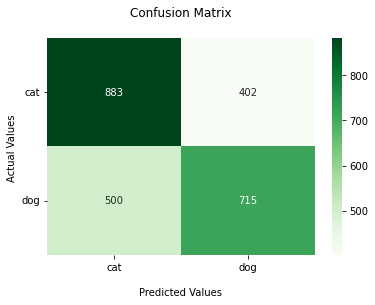

In [64]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,4))
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Greens')
ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(["cat","dog"])
ax.yaxis.set_ticklabels(["cat","dog"],rotation=0)

plt.show()

In [96]:
from xgboost import XGBClassifier

XGB = XGBClassifier(objective="binary:logistic", random_state=42)
XGB.fit(X_train, y_train, eval_metric='auc')
y_pred = XGB.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(XGB.get_params)
#print("Classification Report: \n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.674
<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)>


In [19]:
from sklearn.ensemble import AdaBoostClassifier

AdB = AdaBoostClassifier(verbose=1)
AdB.fit(X_train, y_train)
y_pred = AdB.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred),3)
print("Accuracy:", accuracy)
#print("Classification Report: \n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.604


print('True:', y_test[0:15])
print('False:', y_pred[0:15])

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(verbose=1).fit(X_train, y_train)
y_pred = GBC.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#print("Classification Report: \n", metrics.classification_report(y_test, y_pred))    

      Iter       Train Loss   Remaining Time 
         1           1.3802           23.97m
         2           1.3750           22.81m
         3           1.3703           22.99m
         4           1.3655           22.54m
         5           1.3613           21.58m
         6           1.3561           20.82m
         7           1.3521           20.24m
         8           1.3486           19.71m
         9           1.3444           19.38m
        10           1.3407           19.30m
        20           1.3132           17.41m
        30           1.2895           14.96m
        40           1.2693           12.48m
        50           1.2536           10.36m
        60           1.2396            8.27m
        70           1.2244            6.14m
        80           1.2125            4.05m
        90           1.1995            2.01m
       100           1.1875            0.00s
Accuracy: 0.6548


In [66]:
#Searching for better performance out of the models with RandomizedSearch
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#XGBClassifier
'''
parameters = {
    "colsample_bytree": [0.7, 0.3],
    "gamma": [0, 0.5],
    "learning_rate": [0.03, 0.3], # default 0.1 
    "max_depth": [2, 6], # default 3
    "n_estimators": [100, 150], # default 100
    "subsample": [0.6, 0.4]
}
'''
parameters = {
        'learning_rate': [0.01, 0.1,0.3,0.03],
        'max_depth': [5,6,7],
        'min_child_weight': [1, 2],
        'subsample': [0.5,0.6, 0.7,1],
        'colsample_bytree': [0.3,0.5, 0.7,1],
        'n_estimators' : [int(x) for x in range(10, 100,10)],
         }

random_XGB = RandomizedSearchCV(XGBClassifier(),param_distributions=parameters, random_state=42, n_iter=2, cv=3, 
                                verbose=1, n_jobs=5, return_train_score=True)
random_XGB.fit(X_train,y_train, eval_metric='auc')
y_pred_XGB_random = random_XGB.predict(X_test)
print ("Accuracy Score = ",metrics.accuracy_score(y_test,y_pred_XGB_random))
print (random_XGB.best_params_)

In [84]:
random_XGB.best_params_

{'subsample': 0.6,
 'n_estimators': 150,
 'max_depth': 6,
 'learning_rate': 0.03,
 'gamma': 0.5,
 'colsample_bytree': 0.3}